In [110]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import random 

# Paintings

## Get data

### Import data in your notebook

In [3]:
from vincentvanbot.data import get_data_locally
from vincentvanbot.preprocessing.pipeline import build_pipe
from vincentvanbot.preprocessing.utils import get_jpg_link
from vincentvanbot.preprocessing.utils import jpg_to_array, resize_image

In [4]:
df = get_data_locally()
pipe = build_pipe(dim=(420,360))
df_transformed = pipe.fit_transform(df)
df_transformed.shape

(10, 12)

In [5]:
df_transformed.head()

,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,URL,FORM,TYPE,SCHOOL,TIMEFRAME,IMAGE
0,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Venus and Adonis,1574-88,"Oil on canvas, 68 x 95 cm","Fogg Art Museum, Harvard University, Cambridge",https://www.wga.hu/art/a/aachen/adonis.jpg,painting,mythological,German,1601-1650,"[[[109, 106, 87], [116, 113, 94], [111, 108, 8..."
1,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Allegory,1598,"Oil on copper, 56 x 47 cm","Alte Pinakothek, Munich",https://www.wga.hu/art/a/aachen/allegory.jpg,painting,mythological,German,1601-1650,"[[[95, 89, 77], [81, 76, 64], [68, 65, 53], [5..."
2,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Allegory of Peace, Art and Abundance",1602,"Oil on canvas, 197 x 142 cm","The Hermitage, St. Petersburg",https://www.wga.hu/art/a/aachen/allegorz.jpg,painting,mythological,German,1601-1650,"[[[125, 104, 59], [94, 72, 37], [63, 39, 16], ..."
3,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Jupiter, Antiope and Cupid",1595-98,"Oil on copper, 31 x 21 cm","Kunsthistorisches Museum, Vienna",https://www.wga.hu/art/a/aachen/antiope.jpg,painting,mythological,German,1601-1650,"[[[56, 49, 43], [49, 42, 36], [63, 56, 50], [7..."
4,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Pallas Athena, Venus and Juno",1593,"Oil on canvas, 54 x 67 cm","Museum of Fine Arts, Boston",https://www.wga.hu/art/a/aachen/athena.jpg,painting,mythological,German,1601-1650,"[[[98, 86, 65], [82, 71, 63], [66, 55, 57], [4..."


### Built KNN

In [6]:
from sklearn.neighbors import NearestNeighbors

In [7]:
#load image

def load_image(html_link):
    jpg_link = get_jpg_link(html_link)
    img = jpg_to_array(jpg_link)
    #x = np.expand_dims(x, axis=0)
    X = resize_image(img,width=420,height=360)
    return img, X


shape of x:  (360, 420, 3)
data type:  uint8


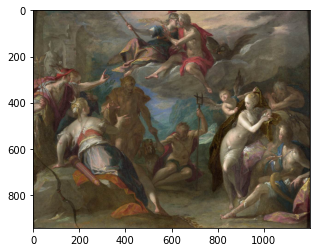

In [8]:
img, X = load_image("https://www.wga.hu/html/a/aachen/gods.html")
print("shape of x: ", X.shape)
print("data type: ", X.dtype)
plt.imshow(img)

In [9]:
# Read scaled images as numpy arrays
images = df_transformed['IMAGE'].iloc[:,]

In [10]:
# Flatten so we have ndarrays of shape (108810,)
def flatten_images():
    """Returns df of flattened IMAGE column"""
    flat_images = [image.flatten() for image in images]
    
    return flat_images
    
#flatten_images()[1]
X_flattened = pd.DataFrame(np.vstack(flatten_images()))
X_flattened

,0,1,2,3,4,5,6,7,8,9,...,453590,453591,453592,453593,453594,453595,453596,453597,453598,453599
0,109,106,87,116,113,94,111,108,89,75,...,14,42,25,17,44,30,21,50,26,19
1,95,89,77,81,76,64,68,65,53,52,...,77,135,111,75,131,107,71,125,102,66
2,125,104,59,94,72,37,63,39,16,62,...,99,149,123,87,156,130,92,160,135,94
3,56,49,43,49,42,36,63,56,50,78,...,45,91,67,52,81,61,47,79,61,48
4,98,86,65,82,71,63,66,55,57,42,...,61,85,66,62,74,55,49,82,63,59
5,37,21,22,38,22,22,39,24,21,42,...,12,5,3,12,10,4,10,13,6,12
6,5,3,6,5,3,6,5,3,6,5,...,10,30,12,9,13,7,9,13,7,9
7,31,25,22,28,22,19,30,24,20,27,...,11,20,13,8,18,11,6,20,13,8
8,47,41,29,47,41,29,47,41,29,48,...,21,43,32,26,43,32,27,42,31,28
9,122,120,121,67,65,66,17,15,16,11,...,14,15,15,15,12,12,12,13,13,13


In [11]:
# fit the KNN model

model = NearestNeighbors(n_neighbors=5)
model = model.fit(X_flattened)
NearestNeighbors(n_neighbors=5)

#connections between neighboring points:
A = model.kneighbors_graph(X_flattened)
A.toarray()

array([[1., 0., 1., 0., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 0., 1., 1., 1.],
       [1., 0., 0., 1., 0., 0., 1., 1., 0., 1.],
       [1., 0., 0., 0., 1., 1., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1., 0., 0., 1., 1.],
       [1., 0., 0., 0., 1., 0., 1., 1., 0., 1.],
       [1., 0., 0., 1., 0., 0., 1., 1., 0., 1.],
       [1., 1., 1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1., 0., 1., 0., 1.]])

In [12]:
test_X = X_flattened.iloc[:1]
#test_X = test_X.reshape(1, -1)

model.kneighbors(test_X,n_neighbors=3)

(array([[    0.        , 37515.61746793, 38147.06809179]]), array([[0, 9, 8]]))

In [13]:
test_X

#df_transformed.iloc[ind_df.iloc[1]]

,0,1,2,3,4,5,6,7,8,9,...,453590,453591,453592,453593,453594,453595,453596,453597,453598,453599
0,109,106,87,116,113,94,111,108,89,75,...,14,42,25,17,44,30,21,50,26,19


In [14]:
idx_closest = model.kneighbors(test_X,n_neighbors=3)[0]
idx_closest

array([[    0.        , 37515.61746793, 38147.06809179]])

In [15]:
idx_closest[:,2]

array([38147.06809179])

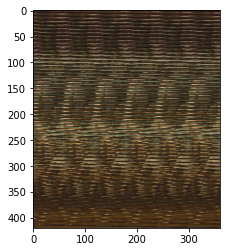

In [16]:
#test_X.reshape(1, 420, 360)

new_x = np.array(test_X)
plt.imshow(new_x.reshape((420, 360, 3)))

In [17]:
df_transformed.iloc[7]

AUTHOR                                        AACHEN, Hans von
BORN-DIED                      (b. 1552, Köln, d. 1615, Praha)
TITLE                                      David and Bathsheba
DATE                                                   1612-15
TECHNIQUE                          Oil on canvas, 128 x 105 cm
LOCATION                      Kunsthistorisches Museum, Vienna
URL               https://www.wga.hu/art/a/aachen/davidbat.jpg
FORM                                                  painting
TYPE                                                historical
SCHOOL                                                  German
TIMEFRAME                                            1601-1650
IMAGE        [[[31, 25, 22], [28, 22, 19], [30, 24, 20], [2...
Name: 7, dtype: object

In [18]:
# Pass song to model, ask for 11 closest points, and unpack the corresponding indices to a list


distance_list = list(model.kneighbors(X_flattened,n_neighbors=5)[0][0])
distance_df = pd.DataFrame(distance_list, columns=['distance'])    
distance_df



# Filter original dataframe with indices list and sort by tempo
#df.iloc[ind_list, :].sort_values(by="IMAGE")

#function takes as input of flatten images 
#output df with disatnce

,distance
0,0.000000
1,37515.617468
2,38147.068092
3,39009.852115
4,39656.707402


In [19]:
ind_list = list(model.kneighbors(X_flattened,n_neighbors=5)[1][0])
#ind_list
ind_df = pd.DataFrame(ind_list, columns=['index'])    
ind_df

,index
0,0
1,9
2,8
3,7
4,2


In [20]:
details_df = df_transformed.iloc[ind_df.iloc[1]].drop(columns=["URL", "IMAGE"])
details_df

,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,FORM,TYPE,SCHOOL,TIMEFRAME
9,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Pan and Selene,1600-05,"Oil on panel, 40 x 49 cm",Private collection,painting,mythological,German,1601-1650


In [21]:
#df.to_dict('details_df')

In [134]:
from google.cloud import storage

BUCKET_NAME='vincent-van-bot-bucket'
BUCKET_PICKLE_FOLDER='data'
PICKLE_PATH='flat_resized_images_100.pkl'


def get_pickle(size=100, source='gcp'):
    """Gets pickle file from source and returns images df"""
    client = storage.Client()

    if source == 'local':
        path = PICKLE_PATH
    elif source == 'gcp':
        path = f"gs://{BUCKET_NAME}/{BUCKET_PICKLE_FOLDER}/{PICKLE_PATH}"
    img_df = pd.read_pickle(path)

    return img_df

df = get_pickle(size=100, source='gcp')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4526,4527,4528,4529,4530,4531,4532,4533,4534,4535
0,0.274510,0.282353,0.188235,0.215686,0.200000,0.164706,0.180392,0.168627,0.149020,0.317647,...,0.078431,0.125490,0.086275,0.078431,0.090196,0.062745,0.039216,0.152941,0.109804,0.094118
1,0.262745,0.278431,0.211765,0.254902,0.294118,0.250980,0.219608,0.290196,0.243137,0.160784,...,0.156863,0.364706,0.301961,0.203922,0.345098,0.294118,0.231373,0.305882,0.231373,0.164706
10,0.066667,0.054902,0.027451,0.058824,0.031373,0.007843,0.078431,0.050980,0.027451,0.094118,...,0.000000,0.286275,0.117647,0.050980,0.113725,0.035294,0.000000,0.074510,0.019608,0.019608
100,0.176471,0.172549,0.164706,0.164706,0.145098,0.121569,0.192157,0.152941,0.149020,0.141176,...,0.243137,0.360784,0.301961,0.274510,0.356863,0.294118,0.298039,0.286275,0.239216,0.239216
101,0.254902,0.192157,0.094118,0.239216,0.172549,0.101961,0.215686,0.145098,0.098039,0.254902,...,0.105882,0.133333,0.129412,0.121569,0.137255,0.137255,0.129412,0.113725,0.109804,0.094118


In [108]:
df.iloc[3:4].shape

(1, 4536)

In [217]:
from vincentvanbot.model import train_KNN_model, return_closest_image, plot_closest_image

ImportError: cannot import name 'return_closest_image' from 'vincentvanbot.model' (/Users/juliaschmitt/code/JulSchmitt/vincentvanbot/vincentvanbot/model.py)

In [121]:
df_array = np.array(df)

In [122]:
# Flatten so we have ndarrays of shape (108810,)


def flatten_images():
    """Returns df of flattened IMAGE column"""
    flat_images = [image.flatten() for image in df_array]
    
    return flat_images
    
#flatten_images()[1]
X_flattened = pd.DataFrame(np.vstack(flatten_images()))
X_flattened.shape

(100, 4536)

In [123]:
knn_model = train_KNN_model(X_flattened, 10)

In [124]:
get_distance(knn_model , X_flattened)

,distance
0,0.000000
1,12.097389
2,12.215402
3,12.416092
4,12.460543
...,...
95,27.136664
96,27.606648
97,27.607588
98,28.623299


In [125]:
get_indexes(knn_model, X_flattened)

,index
0,0
1,17
2,4
3,8
4,50
...,...
95,86
96,3
97,93
98,90


### testing with random input image 

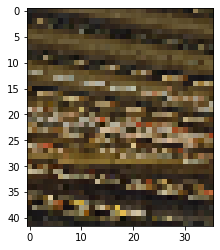

In [126]:
# select input image 
j_test = X_flattened.iloc[5:6]

#plot input image 
input_img = np.array(j_test)
plt.imshow(input_img.reshape((42, 36, 3)))

In [168]:
df_closest_images = return_closest_image(df, knn_model, j_test)

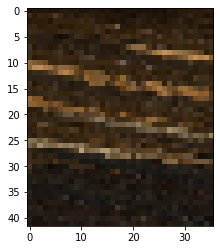

In [170]:
plot_closest_image(df_closest_images)

In [103]:
# Pass song to model, ask for 11 closest points, and unpack the corresponding indices to a list
ind_list = list(knn_model.kneighbors(j_test,n_neighbors=5)[1][0])
print(ind_list)
# Filter original dataframe with indices list and sort by tempo
df.iloc[ind_list, :] #.sort_values(by="distance")

[5, 17, 50, 0, 28]


,0,1,2,3,4,5,6,7,8,9,...,4526,4527,4528,4529,4530,4531,4532,4533,4534,4535
103,0.156863,0.160784,0.168627,0.160784,0.156863,0.137255,0.192157,0.164706,0.125490,0.200000,...,0.098039,0.109804,0.105882,0.098039,0.286275,0.274510,0.207843,0.274510,0.243137,0.168627
12,0.117647,0.070588,0.015686,0.133333,0.090196,0.066667,0.121569,0.082353,0.043137,0.141176,...,0.074510,0.082353,0.062745,0.047059,0.184314,0.164706,0.149020,0.090196,0.062745,0.039216
18,0.109804,0.105882,0.098039,0.098039,0.098039,0.090196,0.098039,0.098039,0.090196,0.086275,...,0.109804,0.101961,0.105882,0.082353,0.145098,0.149020,0.125490,0.105882,0.109804,0.086275
0,0.274510,0.282353,0.188235,0.215686,0.200000,0.164706,0.180392,0.168627,0.149020,0.317647,...,0.078431,0.125490,0.086275,0.078431,0.090196,0.062745,0.039216,0.152941,0.109804,0.094118
13,0.129412,0.121569,0.039216,0.160784,0.149020,0.074510,0.137255,0.109804,0.047059,0.145098,...,0.047059,0.145098,0.133333,0.058824,0.105882,0.113725,0.031373,0.141176,0.129412,0.054902


In [216]:
get_URL(ind_list, df_transformed)

TypeError: get_URL() takes 0 positional arguments but 2 were given

In [215]:
# get URL for closest images
def get_URL():
    for i in ind_list:
        #URL = df_transformed.iloc[i] # original dataframe 
        print(i)
    #return URL
get_URL


<function __main__.get_URL()>

In [140]:
# plot closest output image 

closest_img = np.array(df.iloc[1:2])
#plt.imshow(closest_img.reshape((42, 36, 3)))

In [161]:
def return_closest_image(df, knn_model, X_test):
    """Filters original dataframe with indices and returns reduced dataframe"""
    ind_list = list(knn_model.kneighbors(X_test,n_neighbors=5)[1][0]) # get n closest points, unpack indices to a list
    df_closest_images = df.iloc[ind_list, :] # filter original df with indices. Sort by distance - default??

    return df_closest_images


def plot_closest_image(df_closest_images):
    closest_img = np.array(df_closest_images.iloc[1:2]) #note that first image is input image
    plt.imshow(closest_img.reshape((42, 36, 3)))


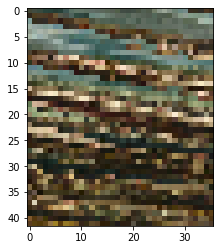

In [164]:
plot_closest_images(df, df_closest_images)

In [ ]:
def plot_closest_images(df_closest_images):
    for i in df_closest_images:
        closest_img = np.array(i) #note that first image is input image
        plt.imshow(closest_img.reshape((42, 36, 3)))
    


In [179]:
ind_list = list(knn_model.kneighbors(j_test,n_neighbors=5)[0][0])[1:]
print(ind_list)

[12.926823084739853, 13.014196020680577, 13.27345009320033, 13.378415533367043]


In [191]:
df_closest_images.iloc[1:2]

,0,1,2,3,4,5,6,7,8,9,...,4526,4527,4528,4529,4530,4531,4532,4533,4534,4535
12,0.117647,0.070588,0.015686,0.133333,0.090196,0.066667,0.121569,0.082353,0.043137,0.141176,...,0.07451,0.082353,0.062745,0.047059,0.184314,0.164706,0.14902,0.090196,0.062745,0.039216


In [181]:
np.array(df_closest_images.iloc[1:2])

array([[0.11764706, 0.07058824, 0.01568628, ..., 0.09019608, 0.0627451 ,
        0.03921569]], dtype=float32)

In [207]:
def get_URL(ind_list, df_transformed):
    for i in ind_list:
        df_transformed.iloc[i] # original dataframe
    #plt.imshow(closest_imgs.reshape((42, 36, 3)))

NameError: name 'iloc' is not defined